
# Trabajo práctico integrador
# Análisis de datos 

## Authors:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS


### Librerías

In [88]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import plotly.express as px

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Categorical transformations
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher


# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Training schemas
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

from functools import reduce

# LEGO Database

- Preguntas interesantes para considerar aquí:
    - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
    - ¿Existe alguna asociación entre los colores y las temáticas?
    - ¿Podría predecir a que temática pertenece un set basado en el contenido de este? (recomendado)
    - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más raras?

![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

In [89]:
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

In [90]:
themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)

In [91]:
# # Opcional: correr esto si arriba da SSLCertVerificationError

# import urllib.request
# import gzip
# import ssl

# # Create an SSL context with certificate verification disabled
# ssl_context = ssl.create_default_context()
# ssl_context.check_hostname = False
# ssl_context.verify_mode = ssl.CERT_NONE

# # Specify the URLs of the datasets
# url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
# url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
# url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
# url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
# url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
# url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
# url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
# url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
# url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
# url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
# url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
# url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

# try:
#     # Read the compressed CSV data with SSL context
#     themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
#     colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
#     part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
#     parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
#     part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
#     elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
#     sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
#     minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
#     inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
#     inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
#     inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
#     inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

#     # Decompress the data and read into DataFrames
#     themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
#     colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
#     part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
#     parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
#     part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
#     elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
#     sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
#     minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
#     inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
#     inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
#     inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
#     inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

# except urllib.error.URLError as e:
#     print("An error occurred while accessing the URL:", e)

Inventory_sets: Este dataset contiene información sobre qué inventario se incluye en qué conjuntos, incluido el ID de inventario ("inventory_id"), el número de set ("set_num") y la cantidad de ese inventario que se incluye ("quantity").

In [92]:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [93]:
#Checking null data
inventory_sets.isnull().sum()

inventory_id    0
set_num         0
quantity        0
dtype: int64

Sets: Este archivo contiene información sobre los sets de LEGO, incluido un número de identificación único para cada set ("set_num"), el nombre del set ("name"), el año en que se lanzó ("year"), su tema ("theme_id"), cuántas partes incluye ("num_parts") y URL que contienen fotos de cada set ("img_url").

In [94]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [95]:
#Checking null data
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

Themes: Este dataset incluye información sobre temas de Lego. Cada tema recibe un número de identificación único ("id"), un nombre ("name") y (si es parte de un tema más grande) de qué tema es parte ("parent_id").

In [96]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [97]:
#Checking null data
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

Colors: Esta data contiene información sobre los colores de LEGO, incluida una identificación única para cada color ("id"), su nombre ("name") y el valor RGB aproximado ("rgb"), y si es transparente ("is_trans").

In [98]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [99]:
#Checking null data
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

Part_categories: Este dataset incluye información sobre la categoría de la pieza ("name") y una identificación única para esa categoría de pieza ("id").

In [100]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [101]:
#Checking null data
part_categories.isnull().sum()

id      0
name    0
dtype: int64

Parts: Este dataset incluye información sobre piezas de lego, incluido un número de identificación único para cada pieza ("part_num"), el nombre de la pieza ("name"), la categoría de la que proviene ("part_cat_id") y su material ("part_material").

In [102]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [103]:
#Checking null data 
parts.isnull().sum()

part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64

Part_relationships: Este dataset incluye información sobre las diferentes relaciones de las partes. 

In [104]:
part_relationships.head()

,rel_type,child_part_num,parent_part_num
0,P,3626cpr3662,3626c
1,P,87079pr9974,87079
2,P,3960pr9971,3960
3,R,98653pr0003,98086pr0003
4,R,98653pr0003,98088pat0003


In [105]:
#Checking null data
part_relationships.isnull().sum()

rel_type           0
child_part_num     0
parent_part_num    0
dtype: int64

Elements

In [106]:
elements.head()

,element_id,part_num,color_id,design_id
0,6300211,67906c01,14,67908.0
1,4566309,2564,0,2564.0
2,4275423,53657,1004,53657.0
3,6194308,92926,71,28967.0
4,6229123,26561,4,26561.0


In [107]:
#Checking null data
elements.isna().sum()

element_id        0
part_num          0
color_id          0
design_id     22050
dtype: int64

Minifigs

In [108]:
minifigs.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [109]:
#Checking null data
minifigs.isnull().sum()

fig_num      0
name         0
num_parts    0
img_url      0
dtype: int64

Inventories: Esta tabla contiene información sobre inventarios, incluida una identificación única ("id"), su versión ("version") y el número del set ("set_num").

In [110]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [111]:
#Checking null data
inventories.isnull().sum()

id         0
version    0
set_num    0
dtype: int64

Inventory_parts: Este dataset contiene información sobre los inventarios de piezas, incluido un número de identificación único ("inventory_id"), el número de pieza ("part_num"), el color de la pieza ("color_id"), cuántas de ellas se incluyen ("quantity") y si se trata de un repuesto ("is_spare").

In [112]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [113]:
#Checking null data
inventory_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8239
dtype: int64

Inventory_minifigs

In [114]:
inventory_minifigs.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


In [115]:
#Checking null data
inventory_minifigs.isnull().sum()

inventory_id    0
fig_num         0
quantity        0
dtype: int64

## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

In [116]:
year = sets['year'].sort_values().unique()

#Calculate the 'num_parts' mean of each year 
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)

In [117]:
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,284.0


In [118]:
sets_size_evolution.describe().round(0)

,sets_mean_size
count,73.0
mean,114.0
std,60.0
min,1.0
25%,81.0
50%,106.0
75%,150.0
max,284.0


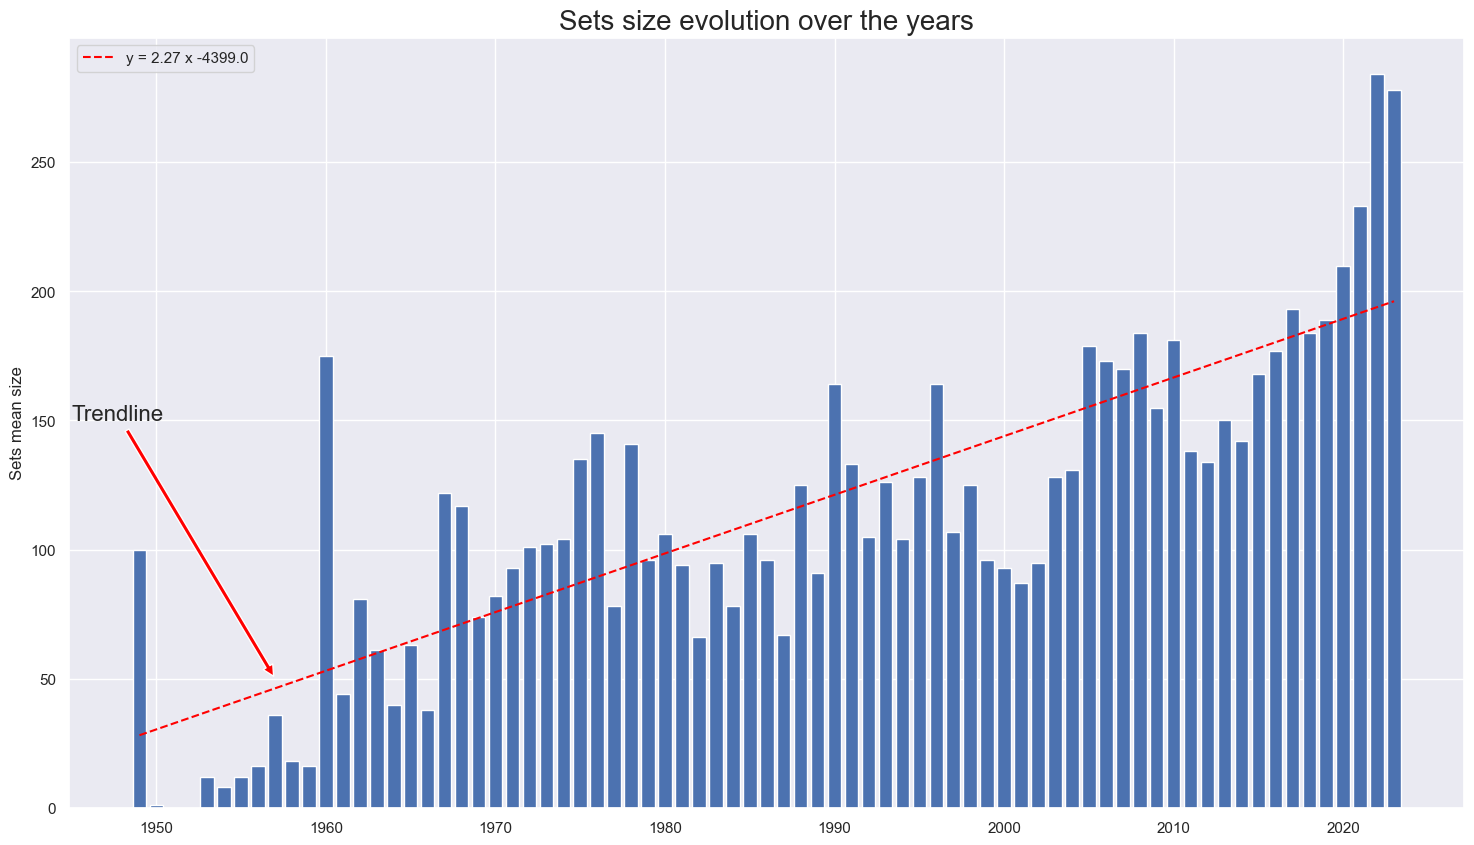

In [119]:
z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Sets mean size')
ax.plot(year, p(year), c='red', linestyle='dashed', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Sets size evolution over the years',fontsize=20)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=16, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

## ¿Existe alguna asociación entre los colores y las temáticas?

In [120]:
#Change names of the columns 'id' and 'name' for 'theme_id' and 'theme_name' in the themes set
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)
themes.head()

,theme_id,theme_name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [121]:
#Merge the datasets 'sets' with 'themes' by the column "theme_id" in the set 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,theme_name,parent_id
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic,NaN
...,...,...,...,...,...,...,...,...
21270,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,Modulex,NaN
21271,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21272,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,Modulex,NaN
21273,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,Modulex,NaN


In [122]:
#Delete the columns 'img_url' of the set 'sets_themes'
sets_themes = sets_themes.drop(columns=['img_url','parent_id'])
sets_themes

,set_num,name,year,theme_id,num_parts,theme_name
0,001-1,Gears,1965,1,43,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic
4,1039-1,Manual Control Set 1,1986,1,39,Technic
...,...,...,...,...,...,...
21270,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,Modulex
21271,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,Modulex
21272,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,Modulex
21273,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,Modulex


In [123]:
#Merge the datasets 'sets_themes' with 'inventories' by the column "set_num"
sets_themes_inv = pd.merge(inventories, sets_themes,  on="set_num")
sets_themes_inv

,id,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,3,1,3931-1,Emma's Splash Pool,2012,494,43,Friends
2,4,1,6942-1,Zo Weevil,1999,134,20,Insectoids
3,15,1,5158-1,"T-Junction, Circle Plates",1990,443,2,Service Packs
4,16,1,903-1,Train Wheels and Couplers,1969,371,10,Supplemental
...,...,...,...,...,...,...,...,...
22885,178159,1,5007846-1,Cole Bag Charm,2023,731,0,Bag and Luggage Tags
22886,178160,1,5007847-1,Kai Bag Charm,2023,731,0,Bag and Luggage Tags
22887,178187,1,5007843-1,Lloyd Bag Charm,2023,731,0,Bag and Luggage Tags
22888,178188,1,5008035-1,Play Unstoppable Sticker Sheet,2023,501,0,Gear


In [124]:
#Change names of the columns 'inventory_id' for 'id' in the 'inventory_parts' set
inventory_parts.rename(columns = {'inventory_id':'id'}, inplace = True)
inventory_parts

,id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN
...,...,...,...,...,...,...
1144003,178341,92198pr0349,70,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1144004,178342,2277c01pr0008,3,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1144005,178342,90396,226,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1144006,178342,92198pr0392,92,1,f,https://cdn.rebrickable.com/media/parts/elemen...


In [125]:
#Merge the datasets 'inventory_parts' with 'sets_themes_inv' by the column "id"
result = pd.merge(inventory_parts, sets_themes_inv, on="id")

In [126]:
#Delete the columns 'is_spare' and 'img_url' of the set 'result'
result = result.drop(columns=['is_spare','img_url'])
result.head()

,id,part_num,color_id,quantity,version,set_num,name,year,theme_id,num_parts,theme_name
0,1,48379c01,72,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
1,1,48395,7,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
2,1,stickerupn0077,9999,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
3,1,upn0342,0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games
4,1,upn0350,25,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games


In [127]:
#create dataset 'Theme_color'
Theme_color = result[['color_id', 'theme_name']]

In [128]:
#group the 'Theme_color' dataset by the 'theme_name' and count the quantity of diferente colors of the parts
colors_themes = pd.DataFrame(Theme_color.groupby(by='theme_name').apply(lambda x: x['color_id'].value_counts()))
colors_themes

count
theme_name color_id       
12V        0           602
           7           346
           4           308
           15          119
           14          119
...                    ...
eLAB       2             5
           15            4
           288           3
           19            1
           47            1

[11040 rows x 1 columns]

In [129]:
#Create a dic with the keys:'theme name' and value:'most common color of the theme' 
first_color_theme={}
for i in Theme_color['theme_name'].unique():
    first_color_theme[i] = colors_themes.loc[i].iloc[0][0]
first_color_theme

{'Gravity Games': 59,
 'Friends': 11492,
 'Insectoids': 233,
 'Service Packs': 682,
 'Supplemental': 828,
 'Creator': 1809,
 'Bulk Bricks': 79,
 'Star Wars': 17756,
 'Disney Series 1': 18,
 'Town Jr.': 420,
 'Desert': 329,
 'Police': 2971,
 'Train': 249,
 'Classic Town': 5396,
 'The LEGO Batman Movie Series 1': 25,
 'Universal Building Set': 667,
 'Bionicle': 2901,
 'Educational and Dacta': 1235,
 'Magnets': 61,
 'Easter': 310,
 'Classic Basic': 652,
 'Harry Potter': 3645,
 'Ultimate Collector Series': 3454,
 'World City': 642,
 'Batman': 3230,
 'Blacktron II': 700,
 'Dino Island': 153,
 'Arctic': 484,
 'Exo-Force': 1199,
 'Clocks and Watches': 251,
 'The LEGO Movie': 813,
 'Creator 3-in-1': 4411,
 'Creator Expert': 2740,
 'Belville': 990,
 'Racers': 3204,
 'Designer Sets': 702,
 'Basic': 1873,
 'Space Port': 230,
 'Cars': 751,
 'Bricktober': 295,
 'Dimensions': 627,
 'Series 3 Minifigures': 20,
 'Series 12 Minifigures': 18,
 'Airport': 1005,
 'Technic': 14731,
 'Mission Deep Freeze': 

In [130]:
first_color_theme_df = pd.DataFrame([first_color_theme.values(), first_color_theme.keys()], index=['color', 'theme']).T
first_color_theme_df 

,color,theme
0,59,Gravity Games
1,11492,Friends
2,233,Insectoids
3,682,Service Packs
4,828,Supplemental
...,...,...
366,18,The Muppets
367,287,Avatar
368,12,Series 23 Minifigures
369,14,Series 24 Minifigures


### Preparación del dataset

In [131]:
parts.rename(columns={'name':'Description'}, inplace=True)

In [132]:
#num_part = number of pieces
result_part = pd.merge(result, parts, how= 'inner', on='part_num')
result_part.head(10)

,id,part_num,color_id,quantity,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material
0,1,48379c01,72,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
1,738,48379c01,0,1,1,7920-1,McDonald's Sports Set Number 5 - Blue Hockey P...,2004,461,6,Hockey,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
2,1733,48379c01,1,1,1,7919-1,McDonald's Sports Set Number 4 - White Hockey ...,2004,461,5,Hockey,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
3,2304,48379c01,1,1,1,7923-1,McDonald's Sports Set Number 1 - White Soccer ...,2004,462,3,Soccer,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
4,3157,48379c01,272,1,1,7918-1,McDonald's Sports Set Number 8 - Green Basketb...,2004,459,5,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
5,7378,48379c01,19,1,1,7921-1,Gray Vest Skateboarder,2004,460,6,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
6,11896,48379c01,15,1,1,7924-1,McDonald's Sports Set Number 2 - Red Soccer Pl...,2004,462,3,Soccer,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
7,15767,48379c01,72,1,1,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004,459,5,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic
8,1,48395,7,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,Sports Snowboard from McDonald's Promotional Set,27,Plastic
9,1,stickerupn0077,9999,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,Sticker Sheet for Set 7922-1,58,Plastic


In [133]:
result_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082105 entries, 0 to 1082104
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1082105 non-null  int64 
 1   part_num       1082105 non-null  object
 2   color_id       1082105 non-null  int64 
 3   quantity       1082105 non-null  int64 
 4   version        1082105 non-null  int64 
 5   set_num        1082105 non-null  object
 6   name           1082105 non-null  object
 7   year           1082105 non-null  int64 
 8   theme_id       1082105 non-null  int64 
 9   num_parts      1082105 non-null  int64 
 10  theme_name     1082105 non-null  object
 11  Description    1082105 non-null  object
 12  part_cat_id    1082105 non-null  int64 
 13  part_material  1082105 non-null  object
dtypes: int64(8), object(6)
memory usage: 115.6+ MB


In [134]:
colorS = colors.copy()

In [135]:
colorS.rename(columns={'id':'color_id', 'name':'color_name'}, inplace=True)

In [136]:
#Merge result part with colors
result_part_colorS = pd.merge(result_part, colorS, on='color_id')
result_part_colorS.drop(['is_trans'], axis=1).head()

,id,part_num,color_id,quantity,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb
0,1,48379c01,72,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68
1,15767,48379c01,72,1,1,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004,459,5,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68
2,58,3003,72,6,1,75060-1,Slave I,2015,171,1996,Ultimate Collector Series,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68
3,206,3003,72,4,1,5974-1,Galactic Enforcer,2009,141,825,Space Police III,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68
4,432,3003,72,1,1,60139-1,Mobile Command Center,2017,61,374,Police,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68


In [137]:
result_part_colorS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082105 entries, 0 to 1082104
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1082105 non-null  int64 
 1   part_num       1082105 non-null  object
 2   color_id       1082105 non-null  int64 
 3   quantity       1082105 non-null  int64 
 4   version        1082105 non-null  int64 
 5   set_num        1082105 non-null  object
 6   name           1082105 non-null  object
 7   year           1082105 non-null  int64 
 8   theme_id       1082105 non-null  int64 
 9   num_parts      1082105 non-null  int64 
 10  theme_name     1082105 non-null  object
 11  Description    1082105 non-null  object
 12  part_cat_id    1082105 non-null  int64 
 13  part_material  1082105 non-null  object
 14  color_name     1082105 non-null  object
 15  rgb            1082105 non-null  object
 16  is_trans       1082105 non-null  object
dtypes: int64(8), object(9)
memo

### 2. Análisis exploratorio inicial 

In [138]:
# First rows visualization and elimination of column 'is_trans'
result_part_colorS.head()

,id,part_num,color_id,quantity,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb,is_trans
0,1,48379c01,72,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68,f
1,15767,48379c01,72,1,1,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004,459,5,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,6C6E68,f
2,58,3003,72,6,1,75060-1,Slave I,2015,171,1996,Ultimate Collector Series,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68,f
3,206,3003,72,4,1,5974-1,Galactic Enforcer,2009,141,825,Space Police III,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68,f
4,432,3003,72,1,1,60139-1,Mobile Command Center,2017,61,374,Police,Brick 2 x 2,11,Plastic,Dark Bluish Gray,6C6E68,f


#### Tipos de variables

A continuación se describen las variables y tipos de variables que componen el dataset **result_part_colorS**.

In [139]:
# Obtener los nombres de las columnas categóricas
cat_cols = result_part_colorS.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

Variables categóricas en el dataset:
part_num
set_num
name
theme_name
Description
part_material
color_name
rgb
is_trans


Donde todas son nominales.

In [140]:
# Obtener los nombres de las columnas numéricas
num_cols = result_part_colorS.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)

Variables numéricas en el dataset:
id
color_id
quantity
version
year
theme_id
num_parts
part_cat_id


Donde las variables "id", "color_id", "theme_id" y "part_cat_id" son variables categóricas nominales. A su vez, "year" y "version" son variables categóricas ordinales. 

Entonces, quedan agrupadas como:

Categóricas nominales:
* part_num
* set_num
* name
* theme_name
* Description
* part_material
* color_name
* rgb
* id
* is_trans
* color_id
* theme_id
* part_cat_id

Categóricas ordinales:
* year
* version

Numéricas:
* num_parts
* quantity


In [141]:
# Separar las variables numéricas y categóricas
num_data = result_part_colorS.loc[:, ["num_parts", "quantity"]]
cat_data = result_part_colorS.drop(["num_parts", 'quantity'], axis=1)

In [142]:
# Resumen de 5 números de var numerica
resumen = num_data.describe()
print(resumen)

          num_parts      quantity
count  1.082105e+06  1.082105e+06
mean   7.290356e+02  3.487840e+00
std    1.035149e+03  1.022884e+01
min    0.000000e+00  1.000000e+00
25%    1.690000e+02  1.000000e+00
50%    4.030000e+02  2.000000e+00
75%    8.450000e+02  4.000000e+00
max    1.169500e+04  3.064000e+03


In [143]:
# Verificar si hay valores faltantes
missing_values_count = result_part_colorS.isnull().sum()
non_zero_missing_num = missing_values_count[missing_values_count != 0]

print("Variables con missing values:")
if non_zero_missing_num.empty:
    print("0")
else:
    for variable, count in non_zero_missing_num.items():
        print(f"{variable}: {count}")

Variables con missing values:
0


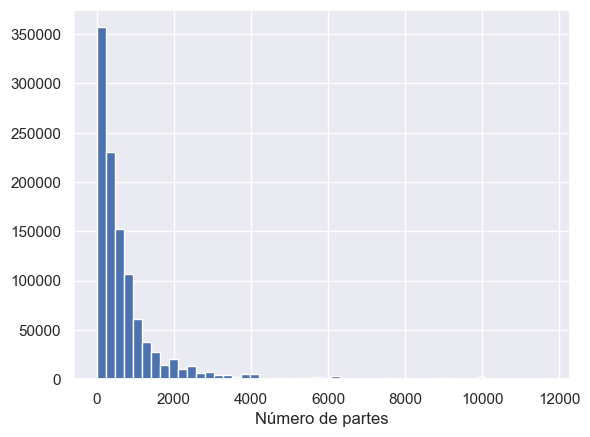

In [144]:
# Explorar la variable numérica

# Histograma
plt.hist(result_part_colorS['num_parts'], bins=50)
plt.xlabel('Número de partes')
plt.show()

/tmp/ipykernel_75133/121759778.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_part_colorS['num_parts'], color='orange')


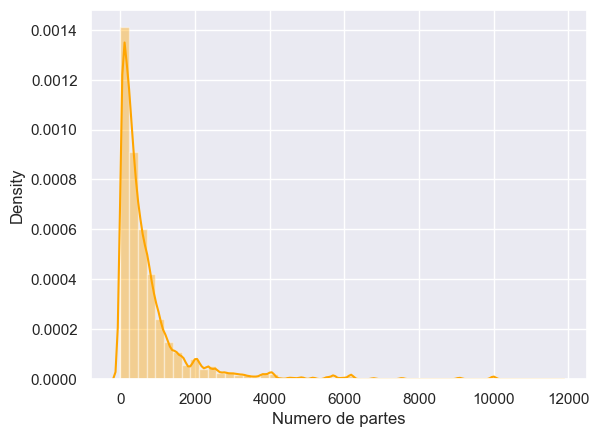

In [145]:
# Ploting num parts
sns.distplot(result_part_colorS['num_parts'], color='orange')
plt.xlabel('Numero de partes')
plt.show()

In [146]:
# Explorar las variables categóricas
for col in cat_data:
    print(f"Classes in {col}:")
    print(result_part_colorS[col].value_counts())
    print('\n')

Classes in id:
id
42856     1554
175682    1347
85198     1309
94873     1309
73052     1126
          ... 
7469         1
9145         1
7109         1
658          1
109688       1
Name: count, Length: 18373, dtype: int64


Classes in part_num:
part_num
6141              28935
3023              20663
3024              16159
54200             14904
3020              13716
                  ...  
4643634               1
4643633               1
4643632               1
4643631               1
92456c16pr0489        1
Name: count, Length: 34745, dtype: int64


Classes in color_id:
color_id
0       193453
15      122872
71      117568
72       86665
4        82919
         ...  
1080         1
1081         1
1078         1
1075         1
1095         1
Name: count, Length: 212, dtype: int64


Classes in version:
version
1     986637
2      86053
3       4741
4       1877
5       1297
8        575
6        312
11       286
9        121
7        101
10        99
12         2
14         1
15  

In [147]:
# Vuelvo al dataset sin variables ID
cat_data2 = result_part_colorS[cat_cols]

# Ver cuantas categorias hay en cada variable
category_counts = cat_data2.nunique()
print(category_counts)

part_num         34745
set_num          16771
name             14173
theme_name         371
Description      34409
part_material        6
color_name         212
rgb                191
is_trans             2
dtype: int64


Basándonos en la cantidad de categorías que tiene cada variable, tiene sentido visualizar "part_material" y "is_trans". 

Los temas y colores se analizarán más adelante.

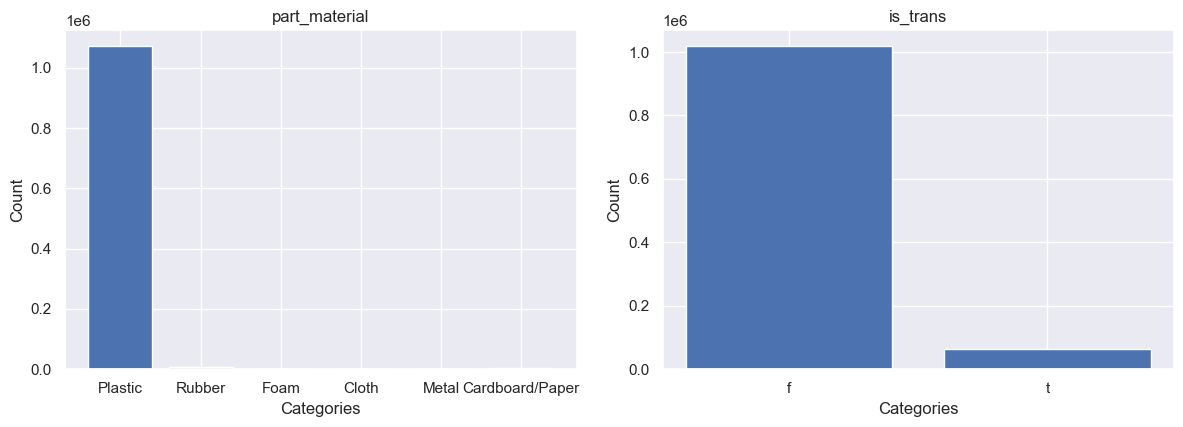

In [148]:
# Determine the number of categorical variables
selected_variables = ['part_material', 'is_trans']
cat_data2 = result_part_colorS[selected_variables]
num_vars = len(cat_data2.keys())

# Set the grid size based on the number of variables
grid_size = int(np.ceil(np.sqrt(num_vars)))

# Create subplots for each categorical variable
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each categorical variable and create the bar plot
for i, (var_name, var_values) in enumerate(cat_data2.items()):
    # Count the occurrences of each category
    category_counts = {}
    for category in var_values:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1
    
    # Get the unique categories and their counts
    unique_categories = list(category_counts.keys())
    counts = list(category_counts.values())
    
    # Create a bar plot for the current variable
    ax = axes[i]
    ax.bar(unique_categories, counts)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.set_title(var_name)

# Hide extra subplots if the number of variables is not a perfect square
if num_vars < grid_size * grid_size:
    for j in range(num_vars, grid_size * grid_size):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the grid of bar plots
plt.show()

In [149]:
for col in cat_data2:
    print(f"Classes in {col}:")
    print(result_part_colorS[col].value_counts())
    print('\n')

Classes in part_material:
part_material
Plastic            1070107
Rubber                7872
Cardboard/Paper       2302
Cloth                 1657
Metal                  100
Foam                    67
Name: count, dtype: int64


Classes in is_trans:
is_trans
f    1017588
t      64517
Name: count, dtype: int64




### Descripción tipo de material

In [150]:
fq_type_material = result_part_colorS['part_material'].value_counts()

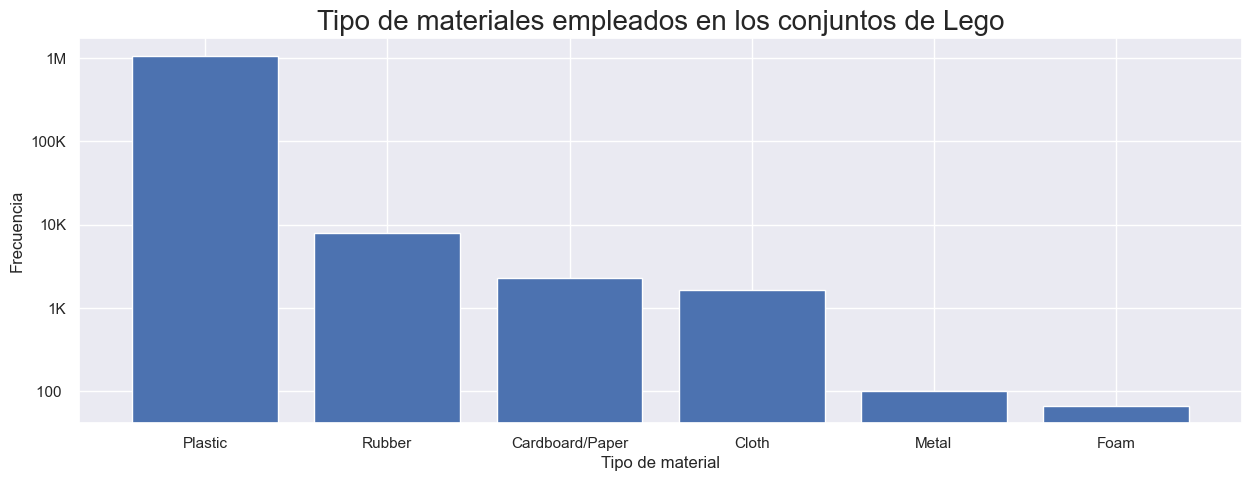

In [151]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(fq_type_material.index, fq_type_material.values,  align='center')
ax.set_xlabel('Tipo de material')
ax.set_ylabel('Frecuencia')
ax.set_title("Tipo de materiales empleados en los conjuntos de Lego", fontsize = 20)
plt.yscale('log')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

#### Análisis de temáticas más comunes

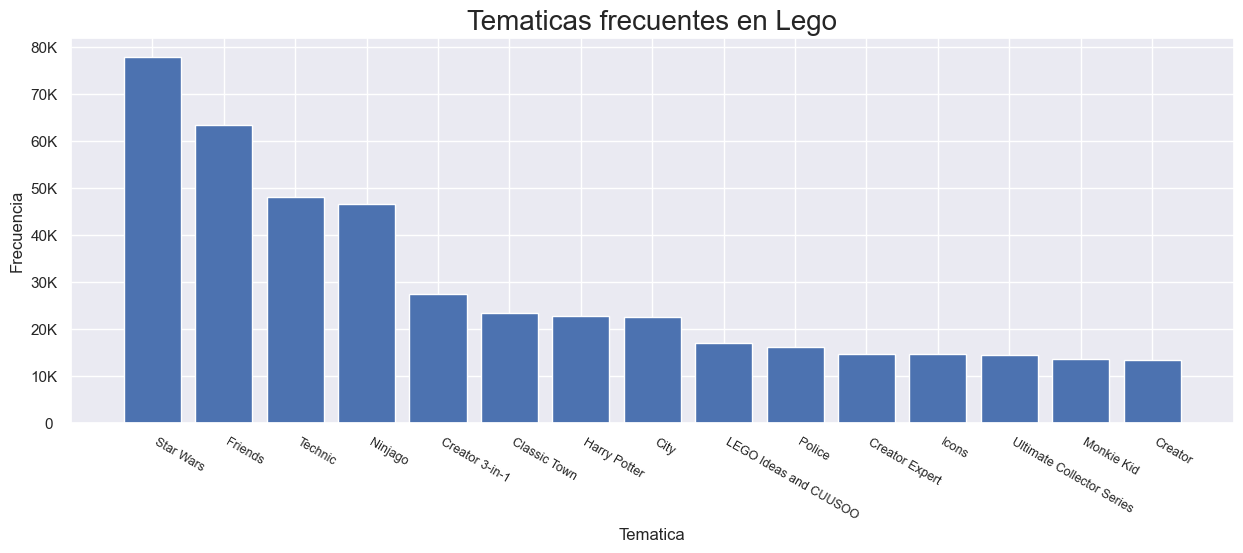

In [152]:
fq_theme_name = pd.value_counts(result_part_colorS['theme_name'])[:15]
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(fq_theme_name.index, fq_theme_name.values,  align='center')
ax.set_xlabel('Tematica')
ax.set_ylabel('Frecuencia')
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Tematicas frecuentes en Lego", fontsize = 20)
plt.show()

#### Análisis de colores

In [153]:
# Agregar un numeral a los rgb para graficarlos
result_part_colorS['rgb'] = result_part_colorS['rgb'].apply(lambda x : '#'+x)
colors_set = dict(zip(result_part_colorS.color_name, result_part_colorS.rgb))
result_part_colorS.head()

,id,part_num,color_id,quantity,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb,is_trans
0,1,48379c01,72,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,#6C6E68,f
1,15767,48379c01,72,1,1,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004,459,5,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,#6C6E68,f
2,58,3003,72,6,1,75060-1,Slave I,2015,171,1996,Ultimate Collector Series,Brick 2 x 2,11,Plastic,Dark Bluish Gray,#6C6E68,f
3,206,3003,72,4,1,5974-1,Galactic Enforcer,2009,141,825,Space Police III,Brick 2 x 2,11,Plastic,Dark Bluish Gray,#6C6E68,f
4,432,3003,72,1,1,60139-1,Mobile Command Center,2017,61,374,Police,Brick 2 x 2,11,Plastic,Dark Bluish Gray,#6C6E68,f


In [154]:
print(f"Hay {result_part_colorS['color_name'].nunique()} colores distintos en el dataset")

Hay 212 colores distintos en el dataset


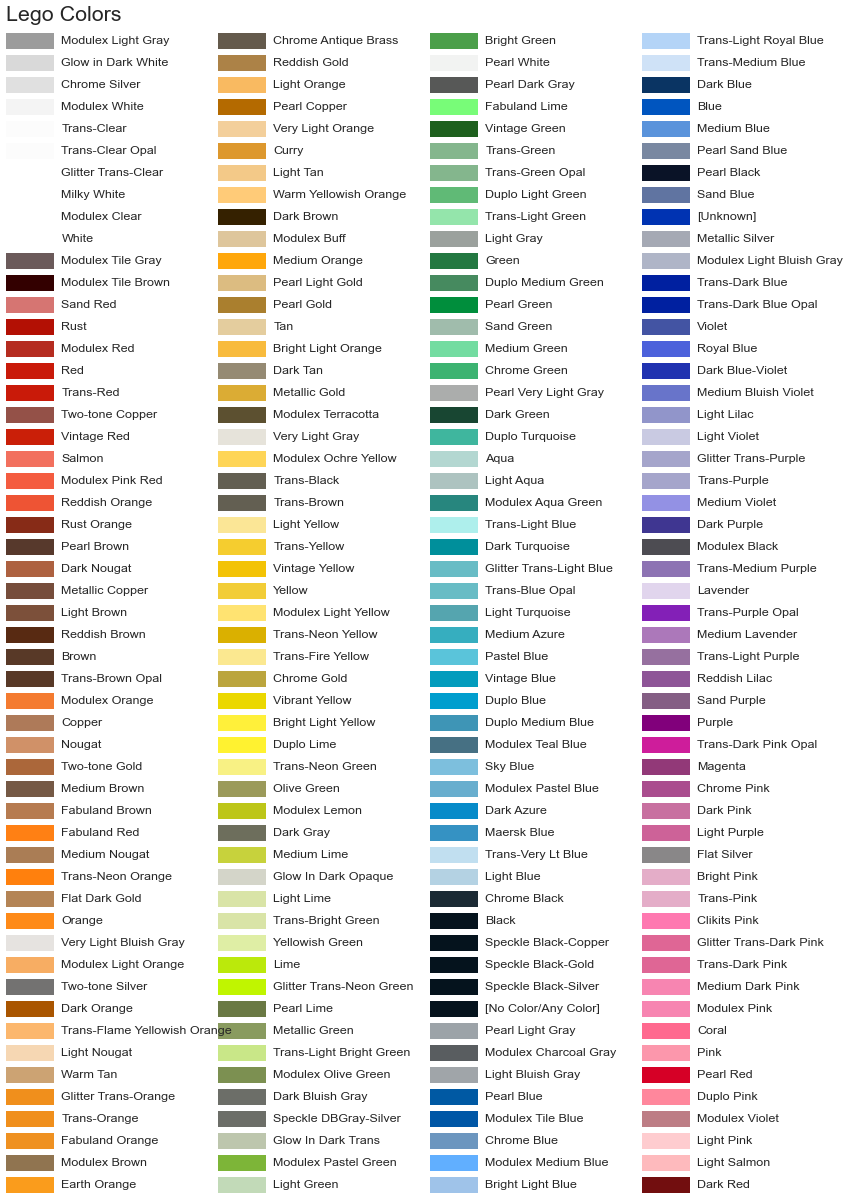

In [155]:
# Visualizar todos los colores en el dataset
import matplotlib.colors as mcolors

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 64

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(colors_set, "Lego Colors")
plt.show()

In [156]:
# Si se quisieran filtrar solo algunos themes usar el codigo comentado (se uso para correr mas rapido probando distintos graficos)
#themes_of_interest = ['Gravity Games', 'LEGO Ideas and CUUSOO', 'Star Wars', 'Friends']  
#filtered_data = color_rgb[color_rgb['theme_name'].isin(themes_of_interest)]

# Agrupar RGB por tema
#grouped_theme = filtered_data.groupby('theme_name')

# Agrupar RGB por tema
grouped_theme = result_part_colorS.groupby('theme_name')

# Count the frequency of each RGB code within each theme
theme_color_counts = grouped_theme['rgb'].value_counts()

# Select the top 10 colors for each theme
top_10_colors = theme_color_counts.groupby(level=0).nlargest(10)

top_10_colors_df = top_10_colors.reset_index(level=0, drop=True).reset_index(name='frequency')

In [157]:
print(f"Hay {top_10_colors_df['theme_name'].nunique()} temas distintos en el dataset")

Hay 371 temas distintos en el dataset


In [158]:
# Vamos a visualizar los 30 temas con mas piezas
grouped_df = top_10_colors_df.groupby('theme_name').agg({'frequency': 'sum'})
#grouped_df
sorted_df = grouped_df.sort_values('frequency', ascending=False)
#sorted_df
filtered_df = sorted_df.head(30) #Cambiar este valor (30) por la cantidad de temas con mayor cantidad de piezas que se quiera ver
filtered_df = filtered_df.reset_index()
theme_list = filtered_df['theme_name'].tolist()
theme_list

['Star Wars',
 'Technic',
 'Friends',
 'Ninjago',
 'Classic Town',
 'Creator 3-in-1',
 'City',
 'Harry Potter',
 'Police',
 'Ultimate Collector Series',
 'LEGO Ideas and CUUSOO',
 'Creator Expert',
 'Icons',
 'Basic Set',
 'Creator',
 'Monkie Kid',
 'Town',
 'Modular Buildings',
 'Racers',
 'Fire',
 'Brickheadz',
 'Batman',
 'Bionicle',
 'Duplo and Explore',
 'Speed Champions',
 'Minecraft',
 'Super Mario',
 'BrickLink Designer Program',
 'Construction',
 'Legends of Chima']

In [159]:
# Si se quisieran filtrar solo algunos themes usar el codigo comentado (se uso para correr mas rapido probando distintos graficos)
filtered_data = result_part_colorS[result_part_colorS['theme_name'].isin(theme_list)]

# Agrupar RGB por tema
grouped_theme = filtered_data.groupby('theme_name')

# Count the frequency of each RGB code within each theme
theme_color_counts = grouped_theme['rgb'].value_counts()

# Select the top 10 colors for each theme
top_10_colors = theme_color_counts.groupby(level=0).nlargest(10)

top_10_colors_df = top_10_colors.reset_index(level=0, drop=True).reset_index(name='frequency')

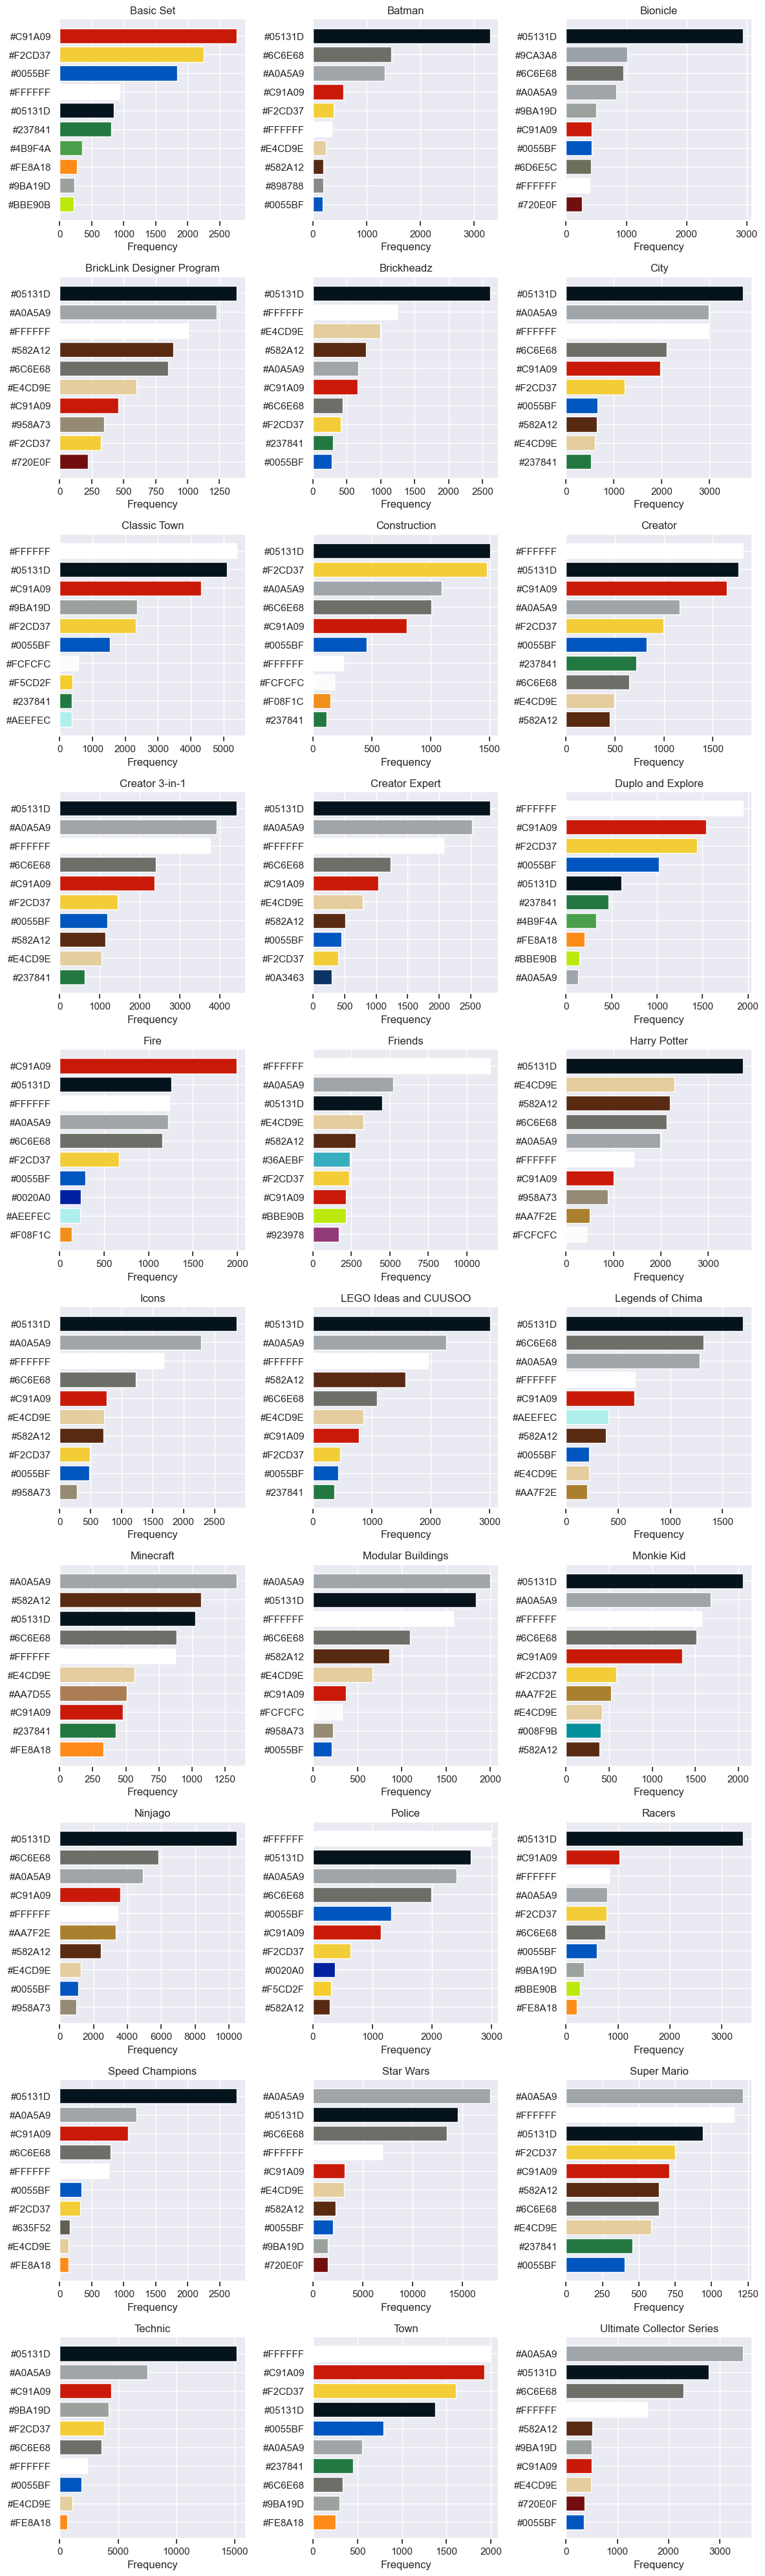

In [160]:
# Group the data by theme_name
grouped_data = top_10_colors_df.groupby('theme_name')

# Extract theme names and unique RGB codes
theme_names = list(grouped_data.groups.keys())

# Calculate the top 10 RGB codes for each theme
top_10_rgb_codes = {}
for theme_name, group in grouped_data:
    sorted_data = group.sort_values(by='frequency', ascending=False)
    top_10_data = sorted_data.head(10)
    top_10_rgb_codes[theme_name] = top_10_data['rgb'].tolist()

# Plotting the horizontal bar charts
num_charts = len(theme_names)
num_cols = 3 
num_rows = (num_charts + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=False)

for i, theme_name in enumerate(theme_names):
    row = i // num_cols
    col = i % num_cols

    theme_rgb_codes = top_10_rgb_codes[theme_name]
    group = grouped_data.get_group(theme_name)
    frequencies = group.loc[group['rgb'].isin(theme_rgb_codes), 'frequency']
    colors = group.loc[group['rgb'].isin(theme_rgb_codes), 'rgb']

    y_pos = np.arange(len(frequencies))
    axs[row, col].barh(y_pos, frequencies, align='center', color=colors)
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(colors)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('Frequency')
    axs[row, col].set_title(theme_name)

    # Create a twin Axes object for separate x-axis scale
    axs_twin = axs[row, col].twiny()

    # Adjust x-axis limits
    max_frequency = max(frequencies)
    axs_twin.set_xlim([0, max_frequency * 1.1])  # Add a buffer of 10% to the maximum frequency for better visibility

    # Remove ticks and labels from the twin Axes
    axs_twin.set_xticks([])
    axs_twin.set_xticklabels([])

# Hide unused subplots
if num_charts < num_rows * num_cols:
    for i in range(num_charts, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()

### Variables de entrada y de salida

Se elige trabajar la pregunta: ¿Podría predecir a que temática pertenece un set basado en el contenido de este? 

A continuación se mostraran las variables de entrada y variable de salida a considerar en este trabajo.

In [161]:
#group the 'Theme_color' dataset by the 'theme_name' and count the quantity of diferente colors of the parts

pc_theme = pd.DataFrame(result_part_colorS.groupby(['theme_id', 'theme_name','name']).apply(lambda x: x['num_parts'].value_counts()))
pc_theme

count
theme_id theme_name    name                                     num_parts       
1        Technic       2022 Ford GT                             1466         237
                       24 Hours Race Car                        1219         162
                       3 In 1 Car / Amphipower                  727          187
                       4 x 4 Crawler                            1327         170
                       4 x 4 Crawler Exclusive Edition          1584         191
...                                                                          ...
746      Database Sets Unused Modulex parts sold by LEGO        276         1834
                       Unused Parts Database Set - Pre-1965     189          189
                       Unused Parts Database Set -1966 to 200﻿0 97            97
                       VIDIYO Tiles - Database Set              80           134
                       Wizard Cards Tiles                       16            16

[16439 rows x 1 columns]

### Preparación de datos

In [162]:
result_part_Colors = result_part_colorS.copy()

In [163]:
# Creo dummies para colores comunes
colores = {
    'negro': '#05131D',
    'gris': '#A0A5A9',
    'blanco': '#FFFFFF',
    'rojo': '#C91A09',
    'amarillo': '#F2CD37'
}

# Create a new variable column for each desired value
for variable_name, colores in colores.items():
    result_part_colorS[variable_name] = np.where(result_part_colorS['rgb'] == colores, 1, 0)

In [164]:
# Creo dummies para materiales
material = {
    'Plastic': 'Plastic',
    'Rubber': 'Rubber',
    'Paper': 'Paper',
    'Cloth': 'Cloth',
    'Metal': 'Metal',
    'Foam': 'Foam'
}

# Create a new variable column for each desired value
for variable_name, material in material.items():
    result_part_colorS[variable_name] = np.where(result_part_colorS['part_material'] == material, 1, 0)

In [165]:
# Creo dummies para piezas transparentes
transp = {
    'transp': 't',
    'no_transp': 'f',
}

# Create a new variable column for each desired value
for variable_name, transp in transp.items():
    result_part_colorS[variable_name] = np.where(result_part_colorS['is_trans'] == transp, 1, 0)

In [166]:
# Limpio el dataset de variables que no sirve agrupar
columns_to_drop = ['id', 'part_num', 'color_id','version','part_material','is_trans','rgb','color_name','part_cat_id','Description', 'quantity']
df_clean = result_part_colorS.drop(columns=columns_to_drop)

In [167]:
# Group the dataset by 'name' and sum the values of 'column1' and 'column2'
sumar = ['negro','gris','blanco','rojo','amarillo','Plastic','Rubber','Paper','Cloth','Metal','Foam','transp','no_transp']
grouped_data = df_clean.groupby('name').agg({**{col: 'sum' for col in sumar}, **{col: 'first' for col in df_clean.columns if col not in sumar}, 'name': 'size'})
grouped_data.rename(columns={'name': 'count'}, inplace=True)

In [168]:
grouped_data

,negro,gris,blanco,rojo,amarillo,Plastic,Rubber,Paper,Cloth,Metal,Foam,transp,no_transp,set_num,count,year,theme_id,num_parts,theme_name
name,,,,,,,,,,,,,,,,,,,
'Up' House​,17,13,23,10,16,255,0,0,0,0,0,6,249,43217-1,255,2023,608,598,Disney
'Where Are My Pants?' Guy,1,0,1,0,0,2,0,0,0,0,0,0,2,71004-13,2,2014,549,6,The LEGO Movie
(Me and My) Birthday,0,0,7,8,5,25,0,0,2,0,0,0,27,2817-1,27,1998,652,33,Playhouse
1 x 1 Bricks,1,0,2,2,2,10,0,0,0,0,0,1,9,222-2,10,1958,371,40,Supplemental
1 x 1 Bricks with Letters (System),0,0,32,0,0,32,0,0,0,0,0,0,32,488-1,32,1966,371,44,Supplemental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eLAB Renewable Energy Set,35,0,3,8,8,87,5,0,2,0,0,0,94,9681-1,94,1999,531,713,eLAB
"garmadon, Garmadon, GARMADON!",35,61,19,27,20,270,0,0,0,0,0,11,259,70656-1,270,2017,616,830,The LEGO Ninjago Movie
iFountain (Lego / Coca-Cola Employee Exclusive),4,0,1,1,1,37,0,0,0,0,0,0,37,iFountain-1,37,2001,301,331,Other


In [169]:
# Dividir por total de piezas en dataset
grouped_data2 = grouped_data
grouped_data2[sumar] = grouped_data[sumar].div(grouped_data['count'], axis=0)

# Formato
grouped_data2[sumar] = grouped_data[sumar].applymap(lambda x: "{:.2%}".format(x))
grouped_data2

,negro,gris,blanco,rojo,amarillo,Plastic,Rubber,Paper,Cloth,Metal,Foam,transp,no_transp,set_num,count,year,theme_id,num_parts,theme_name
name,,,,,,,,,,,,,,,,,,,
'Up' House​,6.67%,5.10%,9.02%,3.92%,6.27%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.35%,97.65%,43217-1,255,2023,608,598,Disney
'Where Are My Pants?' Guy,50.00%,0.00%,50.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,71004-13,2,2014,549,6,The LEGO Movie
(Me and My) Birthday,0.00%,0.00%,25.93%,29.63%,18.52%,92.59%,0.00%,0.00%,7.41%,0.00%,0.00%,0.00%,100.00%,2817-1,27,1998,652,33,Playhouse
1 x 1 Bricks,10.00%,0.00%,20.00%,20.00%,20.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,10.00%,90.00%,222-2,10,1958,371,40,Supplemental
1 x 1 Bricks with Letters (System),0.00%,0.00%,100.00%,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,488-1,32,1966,371,44,Supplemental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eLAB Renewable Energy Set,37.23%,0.00%,3.19%,8.51%,8.51%,92.55%,5.32%,0.00%,2.13%,0.00%,0.00%,0.00%,100.00%,9681-1,94,1999,531,713,eLAB
"garmadon, Garmadon, GARMADON!",12.96%,22.59%,7.04%,10.00%,7.41%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,4.07%,95.93%,70656-1,270,2017,616,830,The LEGO Ninjago Movie
iFountain (Lego / Coca-Cola Employee Exclusive),10.81%,0.00%,2.70%,2.70%,2.70%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,iFountain-1,37,2001,301,331,Other


### ¿Podría predecir a que temática pertenece un set basado en el contenido de este? 

### Nuevo datasets

In [170]:
part_categories.rename(columns = {'id':'part_cat_id', 'name':'cat_name'}, inplace = True)
part_categories.head()

,part_cat_id,cat_name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [171]:
#result_part_colorS.head()
result_part_Colors_cate = pd.merge(result_part_Colors, part_categories, on='part_cat_id')
result_part_Colors_cate.head()

,id,part_num,color_id,quantity,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb,is_trans,cat_name
0,1,48379c01,72,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,Gravity Games,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,#6C6E68,f,Large Buildable Figures
1,15767,48379c01,72,1,1,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004,459,5,Basketball,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Dark Bluish Gray,#6C6E68,f,Large Buildable Figures
2,14705,32476,72,2,1,8059-1,Seabed Scavenger,2010,315,120,Atlantis,"Large Figure Skeletal, Limb, Angular with Ball...",41,Plastic,Dark Bluish Gray,#6C6E68,f,Large Buildable Figures
3,37,47300,72,4,1,8931-1,Thulox,2007,324,39,Bionicle,"Large Figure Skeletal, Limb, Angular 90°, 3 x ...",41,Plastic,Dark Bluish Gray,#6C6E68,f,Large Buildable Figures
4,327,47300,72,2,1,7216-1,Gold Good Guy - looking Right (Duracell 8 pack...,2006,324,22,Bionicle,"Large Figure Skeletal, Limb, Angular 90°, 3 x ...",41,Plastic,Dark Bluish Gray,#6C6E68,f,Large Buildable Figures


In [172]:
result_part_Colors_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082105 entries, 0 to 1082104
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1082105 non-null  int64 
 1   part_num       1082105 non-null  object
 2   color_id       1082105 non-null  int64 
 3   quantity       1082105 non-null  int64 
 4   version        1082105 non-null  int64 
 5   set_num        1082105 non-null  object
 6   name           1082105 non-null  object
 7   year           1082105 non-null  int64 
 8   theme_id       1082105 non-null  int64 
 9   num_parts      1082105 non-null  int64 
 10  theme_name     1082105 non-null  object
 11  Description    1082105 non-null  object
 12  part_cat_id    1082105 non-null  int64 
 13  part_material  1082105 non-null  object
 14  color_name     1082105 non-null  object
 15  rgb            1082105 non-null  object
 16  is_trans       1082105 non-null  object
 17  cat_name       1082105 non-

In [174]:
result_part_Colors_cate['cat_name'].value_counts()

cat_name
Plates                 154955
Bricks                  90165
Plates Special          86491
Bricks Sloped           66205
Tiles                   57995
                        ...  
Znap                      268
Mechanical                178
Minidoll Lower Body        59
Minidoll Heads             48
Minidoll Upper Body        43
Name: count, Length: 66, dtype: int64

In [175]:
df = pd.merge(result_part_Colors_cate, inventory_sets, on='set_num')
df.head()

,id,part_num,color_id,quantity_x,version,set_num,name,year,theme_id,num_parts,theme_name,Description,part_cat_id,part_material,color_name,rgb,is_trans,cat_name,inventory_id,quantity_y
0,14705,32476,72,2,1,8059-1,Seabed Scavenger,2010,315,120,Atlantis,"Large Figure Skeletal, Limb, Angular with Ball...",41,Plastic,Dark Bluish Gray,#6C6E68,f,Large Buildable Figures,16102,1
1,14705,57565,135,2,1,8059-1,Seabed Scavenger,2010,315,120,Atlantis,"Large Figure Weapon Claw, Barraki Mantax Pincer",41,Plastic,Pearl Light Gray,#9CA3A8,f,Large Buildable Figures,16102,1
2,14705,3001,72,1,1,8059-1,Seabed Scavenger,2010,315,120,Atlantis,Brick 2 x 4,11,Plastic,Dark Bluish Gray,#6C6E68,f,Bricks,16102,1
3,14705,3002,4,1,1,8059-1,Seabed Scavenger,2010,315,120,Atlantis,Brick 2 x 3,11,Plastic,Red,#C91A09,f,Bricks,16102,1
4,14705,3022,4,2,1,8059-1,Seabed Scavenger,2010,315,120,Atlantis,Plate 2 x 2,14,Plastic,Red,#C91A09,f,Plates,16102,1


In [ ]:
print('part_num:', result_part['part_num'].value_counts().count())

print('set_num:', result_part['set_num'].value_counts().count())

print('theme_name:', result_part['theme_name'].value_counts().count())

print('part_cat_id:', result_part['part_cat_id'].value_counts().count())

In [ ]:
part_categories.head()

In [ ]:
#Cambio el merge entre result y parts para hacerlo 'inner' y luego hago el merge con part_cat
result_part = pd.merge(result, parts, on='part_num')
result_part = result_part.drop(columns=['color_id', 'version', 'year', 'num_parts', 'part_material'])
result_part_cat = pd.merge(result_part, part_categories, on='part_cat_id')
result_part_cat

In [ ]:
#creo un diccionario con cada categoria de pieza
cat_name = result_part_cat['cat_name'].unique()

dic={}

for i in cat_name:
    dic[i] = i

len(dic)

In [ ]:
result_part_cat2 = result_part_cat[['set_num','theme_id','cat_name']].copy()
result_part_cat2 = result_part_cat2.groupby(['set_num','theme_id','cat_name']).size().reset_index(name='Freq')
result_part_cat2 = result_part_cat2.drop(columns='Freq')
result_part_cat2

In [ ]:
#Crea un dataset donde muestre 'True' si el set_num contiene una determinada part_cat
for variable_name, cat_name in dic.items():
     result_part_cat2[variable_name] = np.where(result_part_cat2['cat_name'] == cat_name, 1, 0)

result_part_cat2

In [ ]:
#Agrupo por 'set_num' este es el set que posiblemente podriamos trabajar para responder la pregunta
result_part_cat2 = result_part_cat2.drop(columns='cat_name')
result_part_cat2 = result_part_cat2.groupby('set_num', ).agg('max')
result_part_cat2

In [ ]:
# Muestra las clases de piezas que tiene el set en el index que se determine 

set_num = '001-1'

x = result_part_cat2.loc[[set_num]].T
x = x.reset_index()
t = x[x[x.columns[1]]==True]
t

In [ ]:
#El inconveniente esta aca.. el data set que cree tiene 16692 sets pero en el original hay 21240 la diferencia es de 4548 sets
sets['set_num'].value_counts().count()

In [ ]:
X = result_part_cat2.drop(columns='theme_id')
y = result_part_cat2['theme_id'].copy()

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print('split')
print("X Train : ", X_train.shape)
print("Y Train: ", y_train.shape)
print("X Test: ", X_test.shape)
print("Y Test: ", y_test.shape)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42).fit(X_train, y_train)
y_pred = rf.predict(X_test).round()

In [ ]:
rf_predict = rf.predict(X_test)
print(classification_report(y_test, rf_predict))

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average= 'weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1:', f1_score(y_test, y_pred, average='weighted'))
#print('AUC-ROC:', roc_auc_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusion - train data")
print(cm)

    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, fmt='g')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.title('Matriz de confusion - test data')
    # plt.show()

In [ ]:
#logreg = LogisticRegressionCV(cv=10, class_weight='balanced', max_iter=1000, random_state=123)
#logreg.fit(X_train, y_train)

### Hash encoding

In [ ]:
# Create objet for hash enconder
encoder=ce.HashingEncoder(cols='',n_components=6)
#Fit and Transform Data
encoder.fit_transform(data)